In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.models import Sequential,save_model
import quandl

In [2]:
from yahoofinancials import YahooFinancials

In [3]:
import yfinance as yf

In [4]:
p = yf.Ticker('pfe')

In [5]:
p.info

{'zip': '10017',
 'sector': 'Healthcare',
 'longBusinessSummary': 'Pfizer Inc. develops, manufactures, and sells healthcare products worldwide. It offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic and pain under the Eliquis, Chantix/Champix, and Premarin family brands; biologics, small molecules, immunotherapies, and biosimilars under the Ibrance, Sutent, Xtandi, Xalkori, Inlyta, Braftovi + Mektovi brands; and sterile injectable and anti-infective medicines under the Sulperazon, Medrol, Vfend, and Zithromax brands. The company also provides medicines and vaccines in various therapeutic areas, such as pneumococcal disease, meningococcal disease, and tick-borne encephalitis under the Prevnar 13/Prevenar 13 (pediatric/adult), FSME-IMMUN, Nimenrix, and Trumenba brands; biosimilars for chronic immune and inflammatory diseases under the Xeljanz, Enbrel, Inflectra, and Eucrisa brands; and amyloidosis, hemophilia, and endocrine diseases under the Vy

In [6]:
pf = p.history()

In [7]:
pf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-03,34.990002,35.290001,34.779999,34.840000,38524200,0.0,0
2021-02-04,34.810001,35.080002,34.700001,34.889999,34284900,0.0,0
2021-02-05,34.919998,35.080002,34.779999,34.919998,31645100,0.0,0
2021-02-08,34.959999,35.009998,34.740002,34.820000,31633900,0.0,0
2021-02-09,34.799999,35.060001,34.759998,34.970001,30140000,0.0,0


In [8]:
data2 = yf.download(['XOM','TOT','CVX'],start = '1996-01-01', end = '2021-12-21' )

[*********************100%***********************]  3 of 3 completed


In [9]:
data2.tail()

Adj Close                            Close                        \
                  CVX        TOT        XOM        CVX        TOT        XOM   
Date                                                                           
2021-02-03  88.959999  42.450001  46.628147  88.959999  42.450001  47.419998   
2021-02-04  89.000000  42.099998  47.522957  89.000000  42.099998  48.330002   
2021-02-05  89.260002  42.320000  49.115902  89.260002  42.320000  49.950001   
2021-02-08  91.480003  43.509998  51.230000  91.480003  43.509998  52.099998   
2021-02-09  90.959999  42.189999  50.630001  90.959999  42.189999  50.630001   

                 High                              Low                        \
                  CVX        TOT        XOM        CVX        TOT        XOM   
Date                                                                           
2021-02-03  89.389999  42.599998  47.669998  86.889999  41.570000  45.419998   
2021-02-04  89.650002  42.160000  48.380001  87.949997  41.500000  47.250000   
2021-02-05  90.470001  42.430000  50.119999  88.639999  41.820000  49.040001   
2021-02-08  92.040001  43.680000  52.360001  90.010002  42.419998  50.709999   
2021-02-09  91.269997  42.799999  50.959999  89.809998  41.500000  49.770000   

                 Open                         Volume                     
                  CVX        TOT        XOM      CVX      TOT       XOM  
Date                                                                     
2021-02-03  87.050003  41.570000  45.630001  9256500  4207400  28459300  
2021-02-04  89.510002  42.139999  47.880001  7917600  2333500  25280300  
2021-02-05  89.940002  42.290001  49.180000  8016200  2869900  34951900  
2021-02-08  90.290001  42.480000  50.919998  9886600  3646600  36998700  
2021-02-09  91.099998  42.799999  50.669998  7601200  3730200  28962300

Text(0.5, 1.0, 'Crude oil price')

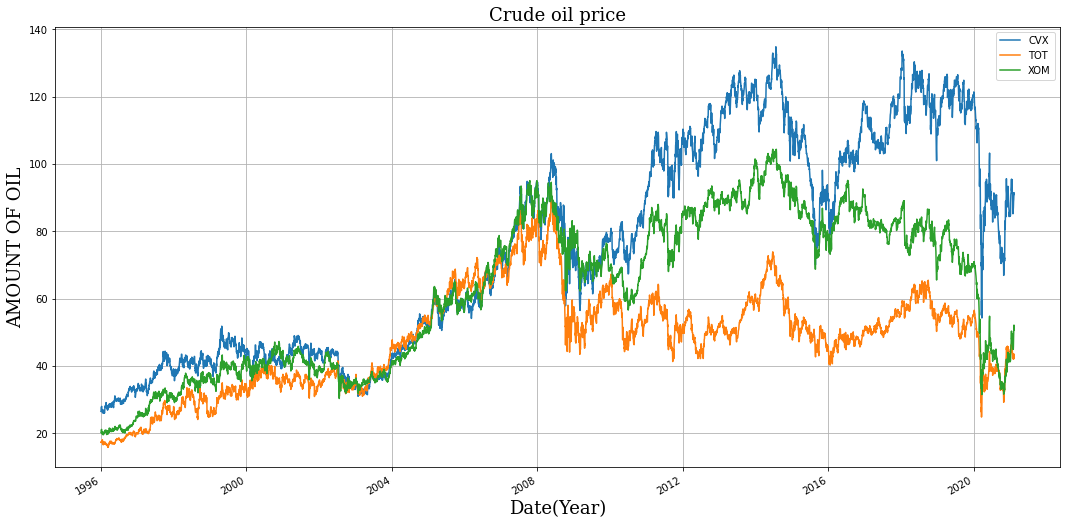

In [10]:
data2['Close'].plot(figsize = (18,9), grid= True,)
plt.ylabel('AMOUNT OF OIL', fontdict =  {'size':18, 'family':'serif'})
plt.xlabel('Date(Year)', fontdict =  {'size':18, 'family':'serif'})
plt.title('Crude oil price', fontdict =  {'size':18, 'family':'serif'})
#plt.text('2007-07-20', 3500, 'Hello')

<AxesSubplot:ylabel='Density'>

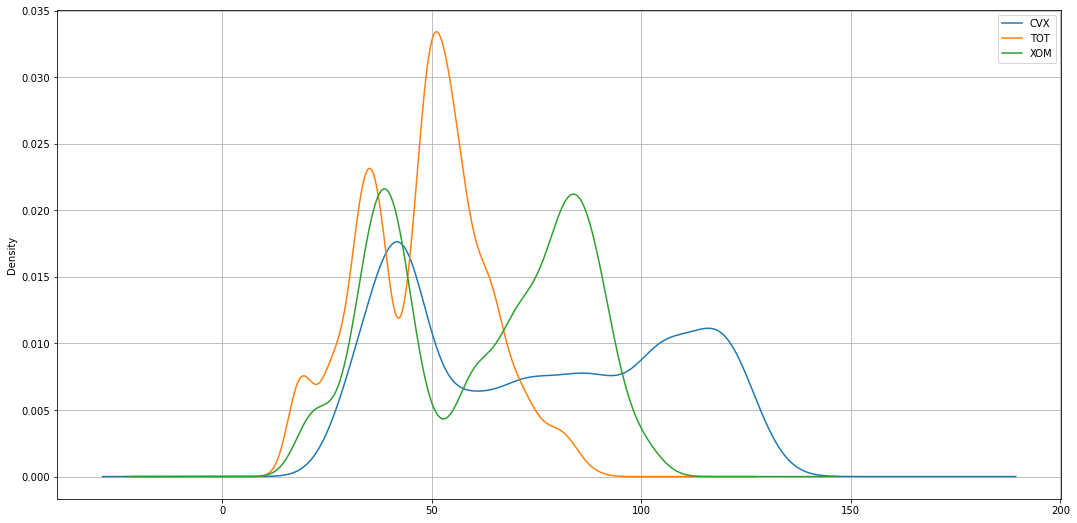

In [11]:
data2['Close'].plot(kind = 'kde', figsize = (18,9), grid = True)

Text(0.5, 1.0, 'Crude oil price')

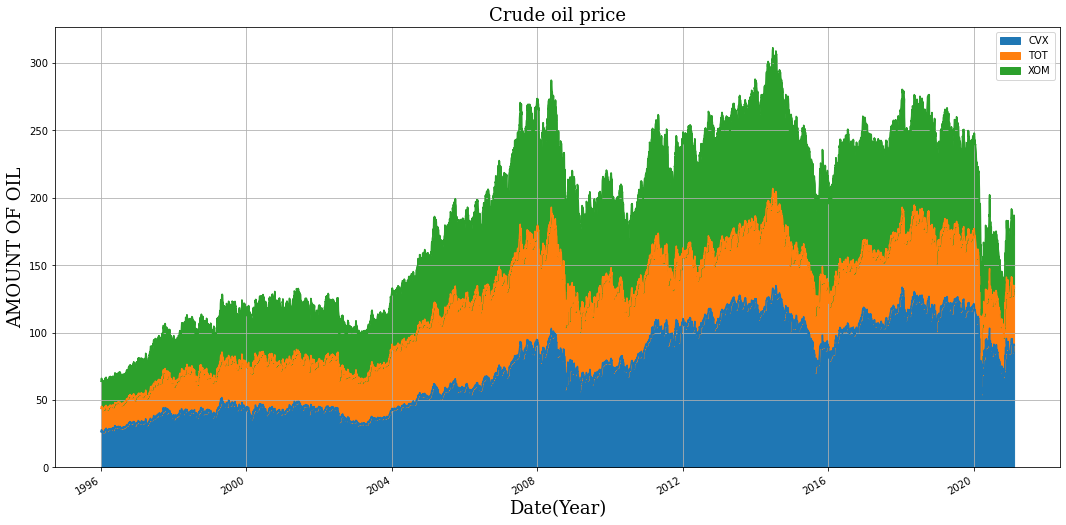

In [12]:
data2['Close'].plot(figsize = (18,9), grid= True,kind = 'area')
plt.ylabel('AMOUNT OF OIL', fontdict =  {'size':18, 'family':'serif'})
plt.xlabel('Date(Year)', fontdict =  {'size':18, 'family':'serif'})
plt.title('Crude oil price', fontdict =  {'size':18, 'family':'serif'})
#plt.text('2007-07-20', 3500, 'Hello')

In [13]:
df = quandl.get("EIA/PET_RWTC_D",start_date = '1995-10-1', end_date='2021-01-12')

In [14]:
df.tail()

,Value
Date,
2021-01-06,50.45
2021-01-07,50.63
2021-01-08,52.14
2021-01-11,52.15
2021-01-12,53.08


In [15]:
Pet_graph = pd.read_csv('RDSB.L.csv',index_col = ['Date'] )
Pet_graph.head()
Pet_graph.shape

(4377, 6)

In [16]:
Pet_graph.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-15,1973.550049,1997.910034,1953.530029,1193.597412,1980.130005,5477576.0
2000-05-16,1970.069946,2010.959961,1942.219971,1191.409302,1976.500000,6786513.0
2000-05-17,1955.270020,1956.140015,1919.599976,1164.911255,1932.540039,4175377.0
2000-05-18,1940.479980,2022.280029,1931.780029,1204.315063,1997.910034,5365214.0
2000-05-19,2004.869995,2038.810059,1911.770020,1215.334106,2016.189941,4296496.0


Text(0.5, 1.0, 'Crude oil price')

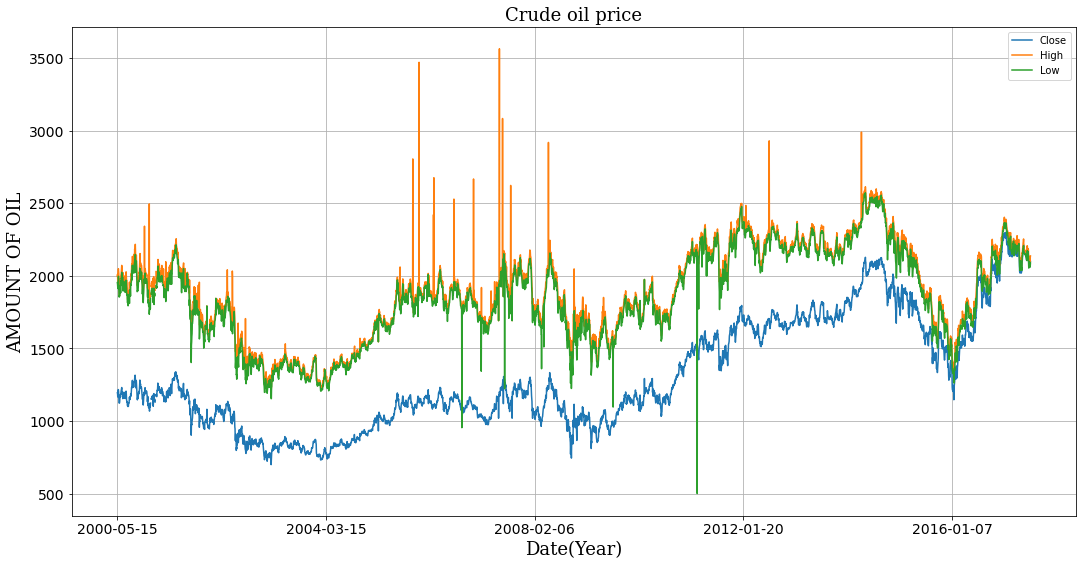

In [17]:
Pet_graph[['Close','High','Low']].plot(figsize = (18,9) , grid = True , fontsize = 14)
plt.ylabel('AMOUNT OF OIL', fontdict =  {'size':18, 'family':'serif'})
plt.xlabel('Date(Year)', fontdict =  {'size':18, 'family':'serif'})
plt.title('Crude oil price', fontdict =  {'size':18, 'family':'serif'})
#plt.text('2007-07-20', 3500, 'Hello')

In [18]:
Pet_2 = pd.read_csv('Crude Oil Prices Daily.csv', index_col = 'Date')


Text(0, 0.5, 'Price of oil')

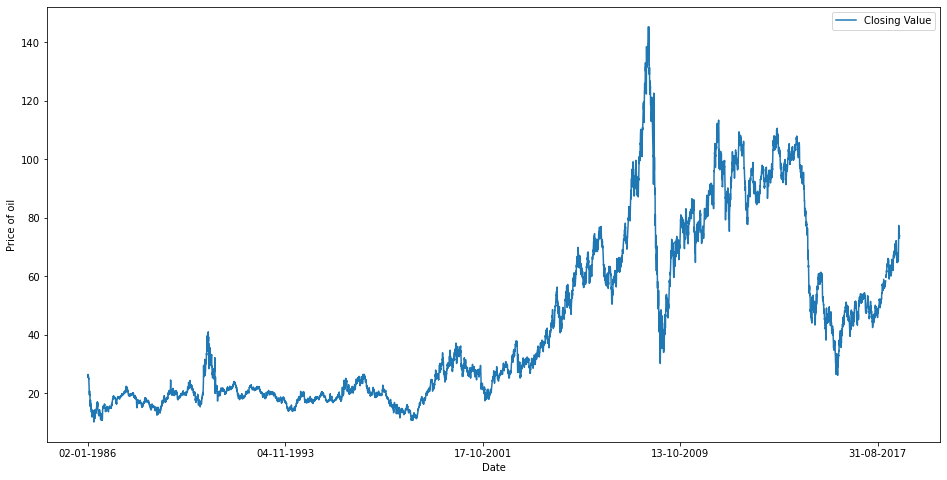

In [19]:
Pet_2.plot(figsize = (16,8))
plt.ylabel('Price of oil',loc = 'center')

In [20]:
Petroleum = pd.read_csv('RDSB.L.csv', usecols = ['Date','Close', 'Open'], index_col = ['Date'])

In [21]:
Petroleum

,Open,Close
Date,,
2000-05-15,1973.550049,1193.597412
2000-05-16,1970.069946,1191.409302
2000-05-17,1955.270020,1164.911255
2000-05-18,1940.479980,1204.315063
2000-05-19,2004.869995,1215.334106
...,...,...
2017-06-28,2122.500000,2113.500000
2017-06-29,2114.500000,2094.500000
2017-06-30,2084.500000,2062.500000


Text(0.5, 1.0, 'Crude oil price')

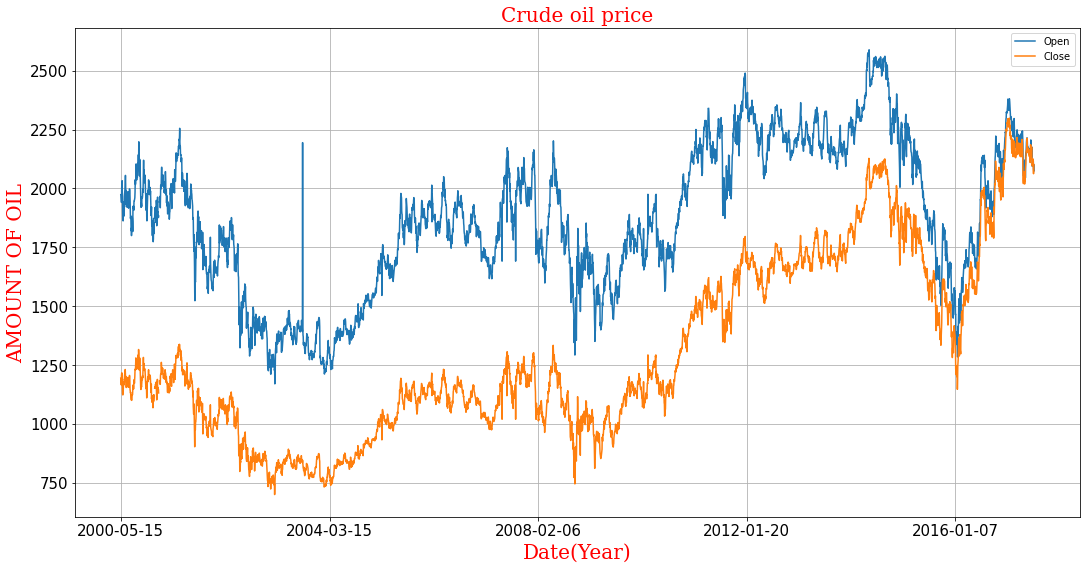

In [22]:
Petroleum.plot(figsize = (18,9),   grid  = True, fontsize = 15)
plt.ylabel('AMOUNT OF OIL', fontdict =  {'size':20, 'family':'serif', 'color':'red'})
plt.xlabel('Date(Year)', fontdict =  {'size':20, 'family':'serif','color':'red'})
plt.title('Crude oil price', fontdict =  {'size':20, 'family':'serif','color':'red'})

In [23]:
import quandl

In [24]:
data2 = quandl.get("EOD/HD", authtoken="xQK6S8cBDz4GT464iLXT")

In [25]:
data2.tail(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-21,187.70,188.84,187.44,188.08,5859058.0,0.0,1.0,174.559014,175.619201,174.317216,174.912409,5859058.0
2017-12-22,188.20,188.46,187.27,188.13,3256519.0,0.0,1.0,175.024008,175.265805,174.159118,174.958909,3256519.0
2017-12-26,188.53,190.42,188.34,190.36,2969182.0,0.0,1.0,175.330905,177.088585,175.154207,177.032785,2969182.0
2017-12-27,190.60,191.49,190.01,190.19,5912613.0,0.0,1.0,177.255983,178.083673,176.707289,176.874687,5912613.0
2017-12-28,190.91,190.98,189.64,189.78,3175631.0,0.0,1.0,177.544280,177.609379,176.363193,176.493392,3175631.0


In [26]:
quand3 = pd.read_csv('https://www.quandl.com/api/v3/datasets/EOD/HD.csv?api_key=xQK6S8cBDz4GT464iLXT')

In [27]:
quand3.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
1085,2013-09-09,72.98,73.79,72.90,73.58,5781800.0,0.00,1.0,62.005719,62.693916,61.937749,62.515495,5781800.0
1086,2013-09-06,73.55,73.56,72.21,72.70,9968400.0,0.00,1.0,62.490006,62.498502,61.351507,61.767824,9968400.0
1087,2013-09-05,74.07,74.21,72.84,72.99,11039000.0,0.00,1.0,62.931812,63.050759,61.886772,62.014215,11039000.0
1088,2013-09-04,73.98,74.51,73.74,74.14,8271600.0,0.00,1.0,62.855345,63.305647,62.651435,62.991286,8271600.0
1089,2013-09-03,74.83,75.25,73.68,73.90,7802800.0,0.39,1.0,63.577528,63.934371,62.600458,62.787375,7802800.0


In [28]:
Petroleum1 = pd.read_csv('RDSB.L.csv', usecols= ['Date','Close','Open'])

In [29]:
Petroleum1.head()

,Date,Open,Close
0,2000-05-15,1973.550049,1193.597412
1,2000-05-16,1970.069946,1191.409302
2,2000-05-17,1955.270020,1164.911255
3,2000-05-18,1940.479980,1204.315063
4,2000-05-19,2004.869995,1215.334106


# data world data

In [30]:
df = pd.read_excel('https://query.data.world/s/rgfwjmrffqoskbo5kyl3vgrfcpe37t',index_col = 'Date')

In [31]:
df.columns = ['OK WTI SpotPrice',' Euro Brent SpotPrice']
df.head()

,OK WTI SpotPrice,Euro Brent SpotPrice
Date,,
01/15/1986,22.93,NaN
02/15/1986,15.46,NaN
03/15/1986,12.61,NaN
04/15/1986,12.84,NaN
05/15/1986,15.38,NaN


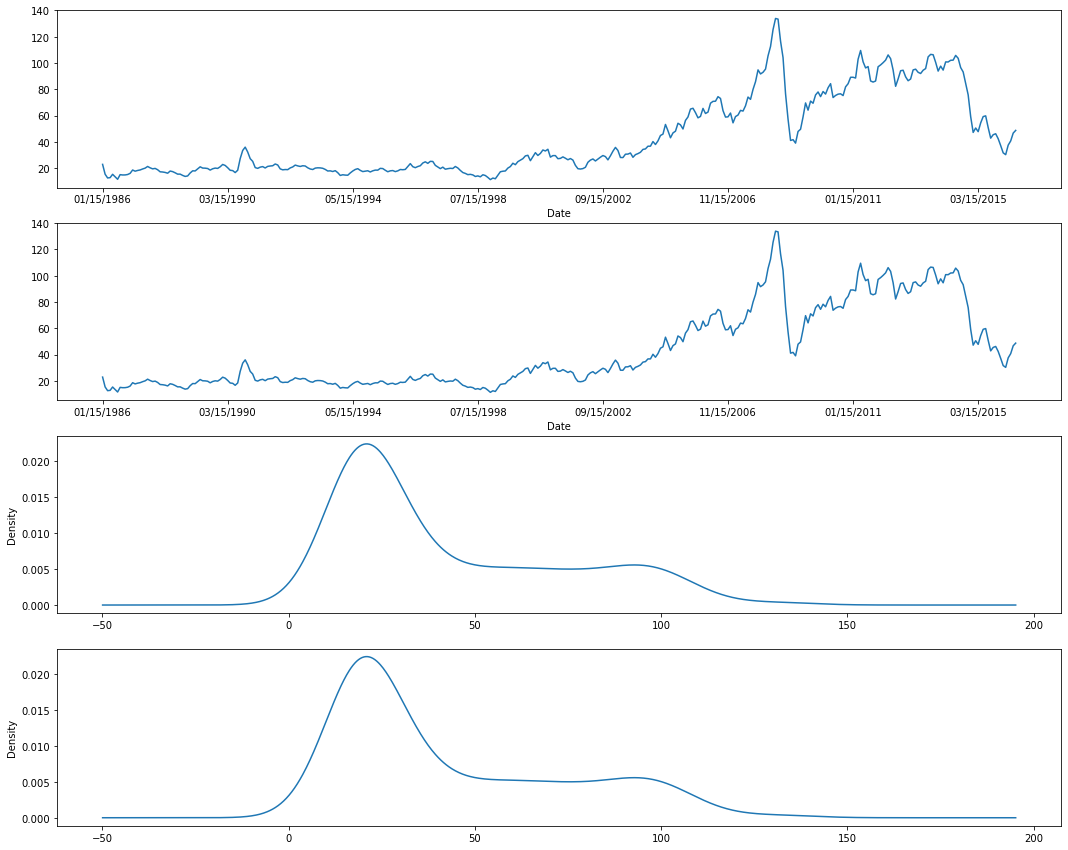

In [32]:
fig, ax = plt.subplots(4,1,figsize = (18,15),)
plt.grid(True)
df['OK WTI SpotPrice'].plot(ax = ax[0],)
df['OK WTI SpotPrice'].plot(ax = ax[1],)
df['OK WTI SpotPrice'].plot(ax = ax[2], kind = 'kde')
df['OK WTI SpotPrice'].plot(ax = ax[3], kind = 'density')
plt.show()